In [84]:
import cv2
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [85]:
# Load the image
image = cv2.imread('red_line_image2.jpg')

In [86]:
# Convert image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [87]:
# Define lower and upper thresholds for red color in HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Create masks for red pixels using the thresholds
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Apply Canny edge detection on the red mask
edges = cv2.Canny(red_mask, 50, 150, apertureSize=3)

# Find contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

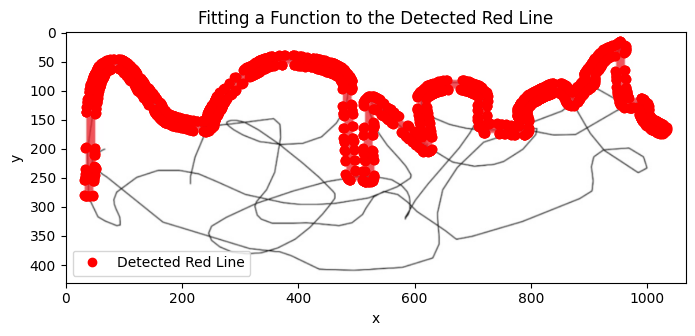

In [89]:
# Check if contours were found
if contours:
    # Extract the largest contour (assuming it corresponds to the red line)
    largest_contour = max(contours, key=cv2.contourArea)

    # Extract the coordinates of the red line
    x_coords = largest_contour[:, 0, 0]
    y_coords = largest_contour[:, 0, 1]

    # Fit a polynomial curve to the coordinates
    degree = 3  # Degree of the polynomial curve
    coeffs = np.polyfit(x_coords, y_coords, degree)
    poly_func = np.poly1d(coeffs)

    # Generate x values for plotting the curve
    x_plot = np.linspace(min(x_coords), max(x_coords), 100)

    # Evaluate the polynomial function for the plotted x values
    y_plot = poly_func(x_plot)

    # Plot the original image with the detected red line and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.plot(x_coords, y_coords, 'ro', label='Detected Red Line')
    # plt.plot(x_plot, y_plot, 'b-', label='Fitted Curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Fitting a Function to the Detected Red Line')
    plt.legend()
    plt.show()
else:
    print("No red line detected.")